# Product Recommender Systems
* Business Objective
* Data Collection and Understanding
* Exploratory Data Analysis
* Data Preparation
* Recommender Systems

## 1. Business Objective: 
* The goal of the project is to help the company generate incremental sales by implementing a recommender system.
* Tasks include:
    * Find most popular product (using maximum sales by volume and dollar amount)
    * Get company with maximum purchase
    * Find similar products (using Cosine similarity)
    * Calculate co-occurrence matrix

## 2. Data Collection and Understanding

In [1]:
import pandas as pd
pd.set_option('display.max_column',200)
import numpy as np
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the dataset
data = pd.read_csv('recommendation data.csv', encoding='iso-8859-1')
data.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

   Customers.last_modified  Customers.customer_type  Orders.id  \
0               1437764306                      0.0       3758   
1               1437764354                      0.0         23   
2               1437764354                      0.0       9531   
3               1437762646                      0.0         29   
4               1437764316                      0.0         30   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   
2                   3         John        Smith       Company1   
3                   4        James     Anderson            NaN   
4                   5      Abraham       Pollak       Company3   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   
2                9531                NaN                    NaN   
3                  29                NaN                   Ebay   
4                  30                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN            57.20   
1                 NaN             USD               NaN            20.00   
2                 NaN             USD               NaN            68.78   
3                 NaN             USD               NaN            19.56   
4                 NaN             USD               NaN            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   
2             NaN                 NaN         

In [3]:
# Overview for the dataset and variables
pandas_profiling.ProfileReport(data)

In [4]:
# Look at the information for the dataset
print(data.shape)
print(list(data.columns))

(4194, 181)
['Customers.id', 'Customers.fname', 'Customers.lname', 'Customers.company', 'Customers.create_date', 'Customers.status', 'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt', 'Customers.account_id', 'Customers.sales_rep', 'Customers.rewards', 'Customers.profile_id', 'Customers.last_modified', 'Customers.customer_type', 'Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.order_number', 'Orders.reorder_id', 'Orders.external_source', 'Orders.external_id', 'Orders.currency', 'Orders.sales_rep', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.coupon_id', 'Orders.coupon_amount', 'Orders.gift_id', 'Orders.gift_amount', 'Orders.fee_name', 'Orders.fee_amount', 'Orders.discount_name', 'Orders.discount_amount', 'Orders.total', 'Orders.balance_due', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.shipping_trans', 'Orders.shipping_flags', 'Orders.weight', 'Orders.tracking', 'Orders.payment_status', 'Orders.p

In [5]:
# Check missing values
data.isnull().sum().sort_values(ascending=True)

Customers.id                       0
Order_Items.id                     0
Orders.subtotal                    0
Orders.currency                    0
Orders.order_number                0
Orders.lname                       0
Orders.customer_id                 0
Orders.id                          0
Customers.last_modified            0
Order_Items.price                  0
Order_Items.qty                    0
Orders.fname                       0
Orders.total                       0
Orders.status                      0
Customers.fname                    0
Orders.placed_date                 0
Customers.lname                    0
Order_Items.parent                 0
Order_Items.product_name           0
Customers.create_date              0
Order_Items.cost                   3
Orders.payment_status              5
Orders.payment_date               18
Orders.payment_amount             18
Orders.updated_date               23
Order_Items.product_id            43
Products.status                  157
P

In [6]:
# Check duplicates
data.duplicated().sum()

0

#### Summary from Data Understanding:
* The data contains info for customers, products, and orders.
* Many missing values on different variables , and no duplicates
* High correlation among several variables

## 3. Exploratory Data Analysis:
* Univariate visualization and summary statistics for each field in the raw dataset
* Bivariate visualization and summary statistics for assessing the relationship between each variable in the dataset
* Multivariate visualizations to understand interactions between different fields in the data
* Feature Engineering: use domain knowledge to create additional relevant features from the existing raw features in the data, and to increase the predictive power of the learning algorithm

In [7]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set_style('whitegrid')

### 3.1 Univariate Summary Statistics

#### 3.1.1 Customer related variables

In [8]:
data[data.columns[pd.Series(data.columns).str.startswith('Customers')]].describe(include='all')

Customers.id Customers.fname Customers.lname Customers.company  \
count    4194.000000            4194            4194               727   
unique           NaN            1631            2557               425   
top              NaN            John        Ceccotti        Company145   
freq             NaN              46              41                27   
mean     1796.518121             NaN             NaN               NaN   
std      1065.679090             NaN             NaN               NaN   
min         3.000000             NaN             NaN               NaN   
25%       865.250000             NaN             NaN               NaN   
50%      1747.500000             NaN             NaN               NaN   
75%      2698.750000             NaN             NaN               NaN   
max      3736.000000             NaN             NaN               NaN   

        Customers.create_date  Customers.status  Customers.mailing  \
count            4.194000e+03             101.0        2114.000000   
unique                    NaN               NaN                NaN   
top                       NaN               NaN                NaN   
freq                      NaN               NaN                NaN   
mean             1.440971e+09               0.0           0.979659   
std              1.887681e+07               0.0           0.141196   
min              1.386089e+09               0.0           0.000000   
25%              1.427323e+09               0.0           1.000000   
50%              1.446412e+09               0.0           1.000000   
75%              1.456955e+09               0.0           1.000000   
max              1.463418e+09               0.0           1.000000   

        Customers.reminders  Customers.tax_exempt  Customers.account_id  \
count                   0.0              5.000000              3.000000   
unique                  NaN                   NaN                   NaN   
top                     NaN                   NaN                   NaN   
freq                    NaN                   NaN                   NaN   
mean                    NaN              0.200000              7.333333   
std                     NaN              0.447214              0.577350   
min                     NaN              0.000000              7.000000   
25%                     NaN              0.000000              7.000000   
50%                     NaN              0.000000              7.000000   
75%                     NaN              0.000000              7.500000   
max                     NaN              1.000000              8.000000   

        Customers.sales_rep  Customers.rewards  Customers.profile_id  \
count                   0.0                0.0                   0.0   
unique                  NaN                NaN                   NaN   
top                     NaN                NaN                   NaN   
freq                    NaN                NaN                   NaN   
mean                    NaN                NaN                   NaN   
std                     NaN                NaN                   NaN   
min                     NaN                NaN                   NaN   
25%                     NaN                NaN                   NaN   
50%                     NaN                NaN                   NaN   
75%                     NaN                NaN                   NaN   
max                     NaN                NaN                   NaN   

        Customers.last_modified  Customers.customer_type  
count              4.194000e+03              3771.000000  
unique                      NaN                      NaN  
top                         NaN                      NaN  
freq                        NaN                      NaN  
mean               1.450401e+09                 0.137364  
std                1.021334e+07                 0.391842  
min                1.437559e+09                 0.000000  
25%                1.437763e+09         

#### 3.1.2 Orders related variables

In [9]:
data[data.columns[pd.Series(data.columns).str.startswith('Orders')]].describe(include='all')

Orders.id  Orders.customer_id Orders.fname Orders.lname  \
count    4194.000000         4194.000000         4194         4194   
unique           NaN                 NaN         1636         2559   
top              NaN                 NaN         John     Ceccotti   
freq             NaN                 NaN           46           41   
mean     9142.984025         1796.518121          NaN          NaN   
std      5276.541078         1065.679090          NaN          NaN   
min        23.000000            3.000000          NaN          NaN   
25%      4258.000000          865.250000          NaN          NaN   
50%      9641.000000         1747.500000          NaN          NaN   
75%     14011.750000         2698.750000          NaN          NaN   
max     17437.000000         3736.000000          NaN          NaN   

       Orders.company Orders.order_number  Orders.reorder_id  \
count             728                4194          82.000000   
unique            427                3565                NaN   
top        Company145               16186                NaN   
freq               27                  10                NaN   
mean              NaN                 NaN        7389.158537   
std               NaN                 NaN        3818.085460   
min               NaN                 NaN          30.000000   
25%               NaN                 NaN        4537.250000   
50%               NaN                 NaN        6887.000000   
75%               NaN                 NaN       10832.000000   
max               NaN                 NaN       16201.000000   

       Orders.external_source  Orders.external_id Orders.currency  \
count                     365        5.000000e+00            4194   
unique                      3                 NaN               1   
top                      Ebay                 NaN             USD   
freq                      363                 NaN            4194   
mean                      NaN        6.018061e+08             NaN   
std                       NaN        1.342831e+09             NaN   
min                       NaN        6.638000e+01             NaN   
25%                       NaN        1.698485e+06             NaN   
50%                       NaN        1.698485e+06             NaN   
75%                       NaN        1.698485e+06             NaN   
max                       NaN        3.003935e+09             NaN   

        Orders.sales_rep  Orders.subtotal   Orders.tax  Orders.shipping  \
count                0.0      4194.000000  3737.000000      3999.000000   
unique               NaN              NaN          NaN              NaN   
top                  NaN              NaN          NaN              NaN   
freq                 NaN              NaN          NaN              NaN   
mean                 NaN       131.925196     0.800838         7.141263   
std                  NaN       231.156869     4.859280         4.531500   
min                  NaN         2.890000     0.000000         0.000000   
25%                  NaN        36.750000     0.000000         0.000000   
50%                  NaN        74.740000     0.000000         9.950000   
75%                  NaN       139.960000     0.000000         9.950000   
max                  NaN      5163.040000   132.930000        32.810000   

        Orders.coupon_id  Orders.coupon_amount  Orders.gift_id  \
count         882.000000            882.000000             0.0   
unique               NaN                   NaN             NaN   
top                  NaN                   NaN             NaN   
freq                 NaN                   NaN             NaN   
mean           20.403628              9.972676             NaN   
std            11.850291             14.617203             NaN   
min             4.000000              0.000000             NaN   
25%            11.000000              0.680000             NaN   
50%            26.000000              5.000000             NaN   
75%        

#### 3.1.3 Order Items related variables

In [10]:
data[data.columns[pd.Series(data.columns).str.startswith('Order_Items')]].describe(include='all')

Order_Items.id  Order_Items.parent  Order_Items.product_id  \
count      4194.000000         4194.000000             4151.000000   
unique             NaN                 NaN                     NaN   
top                NaN                 NaN                     NaN   
freq               NaN                 NaN                     NaN   
mean      11156.068670         9142.984025             4451.426162   
std        5802.466202         5276.541078             5577.392427   
min          31.000000           23.000000                1.000000   
25%        5847.250000         4258.000000             1009.000000   
50%       11770.000000         9641.000000             1867.000000   
75%       16482.750000        14011.750000             4345.500000   
max       20202.000000        17437.000000            26175.000000   

                                 Order_Items.product_name  \
count                                                4194   
unique                                               1821   
top     Medline MoliCare Super Plus Disposable Adult D...   
freq                                                   53   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

        Order_Items.attributes Order_Items.attribute_names  \
count                      0.0                          51   
unique                     NaN                           1   
top                        NaN                           |   
freq                       NaN                          51   
mean                       NaN                         NaN   
std                        NaN                         NaN   
min                        NaN                         NaN   
25%                        NaN                         NaN   
50%                        NaN                         NaN   
75%                        NaN                         NaN   
max                        NaN                         NaN   

        Order_Items.attribute_prices  Order_Items.qty  Order_Items.price  \
count                            0.0      4194.000000        4194.000000   
unique                           NaN              NaN                NaN   
top                              NaN              NaN                NaN   
freq                             NaN              NaN                NaN   
mean                             NaN         1.858846          67.349132   
std                              NaN         8.821959          95.571793   
min                              NaN         1.000000           1.120000   
25%                              NaN         1.000000          24.030000   
50%                              NaN         1.000000          43.460000   
75%                              NaN         1.000000          74.990000   
max                              NaN       500.000000        1899.000000   

        Order_Items.cost  Order_Items.registry_item  Order_Items.related_id  \
count        4191.000000                        0.0                     0.0   
unique               NaN                        NaN                     NaN   
top                  NaN                        NaN                     NaN   
freq                 NaN                        NaN                     NaN   
mean           51.112718                        NaN                     NaN   
std            74.155515                        NaN                     NaN   
min             0.280000                        NaN                     NaN   
25%            16.200000                        NaN                     NaN   
50%            32.500000                        NaN              

#### 3.1.4 Products related variables

In [11]:
data[data.columns[pd.Series(data.columns).str.startswith('Products')]].describe(include='all')

Products.id  Products.status  Products.product_type  \
count    4037.000000      4037.000000                    0.0   
unique           NaN              NaN                    NaN   
top              NaN              NaN                    NaN   
freq             NaN              NaN                    NaN   
mean     4518.398068         0.987119                    NaN   
std      5614.454744         1.386196                    NaN   
min         1.000000         0.000000                    NaN   
25%      1012.000000         0.000000                    NaN   
50%      1867.000000         0.000000                    NaN   
75%      4371.000000         3.000000                    NaN   
max     26175.000000         5.000000                    NaN   

              Products.template  Products.vendor  Products.import_id  \
count                      3973      4037.000000         4037.000000   
unique                        2              NaN                 NaN   
top     sub-product-detail.html              NaN                 NaN   
freq                       3886              NaN                 NaN   
mean                        NaN         1.629676            3.400297   
std                         NaN         1.420626            2.248065   
min                         NaN         1.000000            1.000000   
25%                         NaN         1.000000            3.000000   
50%                         NaN         1.000000            3.000000   
75%                         NaN         2.000000            3.000000   
max                         NaN        11.000000           21.000000   

                     Products.name  \
count                         4037   
unique                        1391   
top     Emesis Bags,Blue,36.000 OZ   
freq                           103   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                    Products.display_name  Products.menu_name  \
count                                                3662                 0.0   
unique                                               1220                 NaN   
top     Medline Emesis/Barf Bags, throw up bags, Blue ...                 NaN   
freq                                                   88                 NaN   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

        Products.list_price  Products.price  Products.sale_price  \
count           4017.000000     4036.000000          1160.000000   
unique                  NaN             NaN                  NaN   
top                     NaN             NaN                  NaN   
freq                    NaN             NaN                  NaN   
mean             121.683321       74.266043            70.754095   
std              245.856090       98.829781            72.405928   
min                1.020000        1.540000             2.890000   
25%               33.110000       24.400000            32.660000   
50%               72.330000       48.245000            54.100000   
75%              134.390000       83.360000           119.990000   
max             8439.000000     1899.000000           659.990000   

        Products.cost  Products.flags  Products.left_flag  \
count     4037.000000     2987.000000         1239.000000   
unique

### 3.2 Reformatting and Data type correction

#### 3.2.1 Convert the date variables to datetime format

In [12]:
# Convert from string to datetime
data[['Customers.create_date', 'Customers.last_modified', 'Orders.payment_date', 'Orders.placed_date', 
      'Orders.updated_date', 'Orders.shipped_date', 'Products.last_modified']
    ] = data[['Customers.create_date', 'Customers.last_modified', 'Orders.payment_date', 'Orders.placed_date', 
              'Orders.updated_date', 'Orders.shipped_date', 'Products.last_modified']
            ].apply(lambda x: pd.to_datetime(x, unit='s'))

#### 3.2.2 Convert from numerical to categorical

In [13]:
# Convert from numerical to categorical
data[['Customers.customer_type', 'Orders.payment_status', 'Orders.status', 'Products.status', 'Products.vendor', 
      'Products.flags', 'Products.taxable', 'Products.shopping_flags', 'Products.import_flags']
    ] = data[['Customers.customer_type', 'Orders.payment_status', 'Orders.status', 'Products.status', 
              'Products.vendor', 'Products.flags', 'Products.taxable', 'Products.shopping_flags', 
              'Products.import_flags']].apply(lambda x: x.astype('category'))

In [14]:
data.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

  Customers.create_date  Customers.status  Customers.mailing  \
0   2015-03-10 20:18:44               NaN                NaN   
1   2013-12-03 16:45:39               NaN                NaN   
2   2013-12-03 16:45:39               NaN                NaN   
3   2013-12-11 16:44:23               NaN                NaN   
4   2013-12-12 15:19:59               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

  Customers.last_modified Customers.customer_type  Orders.id  \
0     2015-07-24 18:58:26                     0.0       3758   
1     2015-07-24 18:59:14                     0.0         23   
2     2015-07-24 18:59:14                     0.0       9531   
3     2015-07-24 18:30:46                     0.0         29   
4     2015-07-24 18:58:36                     0.0         30   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   
2                   3         John        Smith       Company1   
3                   4        James     Anderson            NaN   
4                   5      Abraham       Pollak       Company3   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   
2                9531                NaN                    NaN   
3                  29                NaN                   Ebay   
4                  30                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN            57.20   
1                 NaN             USD               NaN            20.00   
2                 NaN             USD               NaN            68.78   
3                 NaN             USD               NaN            19.56   
4                 NaN             USD               NaN            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   
2             NaN                 NaN             NaN           

### 3.3 Most most popular product 
* Using maximum sales by volume and dollar amount

#### 3.3.1 Popular products sorted by sales dollar amount

In [15]:
# Money related variables for orders
data[['Orders.id', 'Order_Items.product_name', 'Order_Items.qty', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 
      'Orders.coupon_amount', 'Orders.gift_amount', 'Orders.fee_amount', 'Orders.discount_amount', 'Orders.total', 
      'Orders.payment_amount', 'Order_Items.price', 'Order_Items.cost']].head(15)

Orders.id                           Order_Items.product_name  \
0        3758                             Basic Rollators, Green   
1          23                           Urinary Drain Bags,0.000   
2        9531      SensiCare Nitrile Exam Gloves, Blue, XX-Large   
3          29                        Basket for 2-Button Walkers   
4          30                                         Tens Units   
5         226         FitRight Ultra Protective Underwear, Large   
6        1658  SensiCare Silk Nitrile Exam Gloves, Dark Blue,...   
7          32  Aloetouch Sensitive Personal Cleansing Baby Wipes   
8          40                       Universal Raised Toilet Seat   
9          70    Drive medical excersize paddler item #RTL10273    
10         74                      Drive Medical item # RTL10273   
11         76  Biohazard Multipurpose Sharps Containers, Red,...   
12         88               Protection Plus Disposable Underpads   
13         88  Aloetouch SELECT Premium Spunlace Personal Cle...   
14       3572  Aloetouch SELECT Premium Spunlace Personal Cle...   

    Order_Items.qty  Orders.subtotal  Orders.tax  Orders.shipping  \
0                 1            57.20         0.0             9.95   
1                 4            20.00         NaN             9.99   
2                 1            68.78         0.0             9.95   
3                 1            19.56         0.0             9.95   
4                 1            36.05         NaN             9.95   
5                 1            44.46         NaN             9.95   
6                 1            14.63         NaN             9.95   
7                 1            39.19         0.0             9.95   
8                 1            59.75         0.0             9.95   
9                 1            34.00         0.0             9.95   
10                1            34.00         0.0             9.95   
11                2            21.52         NaN             9.95   
12                1           118.68         0.0             9.95   
13                2           118.68         0.0             9.95   
14                2            75.62         NaN             9.95   

    Orders.coupon_amount  Orders.gift_amount  Orders.fee_amount  \
0                   2.86                 NaN                NaN   
1                    NaN                 NaN                NaN   
2                    NaN                 NaN                NaN   
3                    NaN                 NaN               0.04   
4                    NaN                 NaN                NaN   
5                    NaN                 NaN                NaN   
6                    NaN                 NaN                NaN   
7                    NaN                 NaN                NaN   
8                    NaN                 NaN                NaN   
9                    NaN                 NaN                NaN   
10                   NaN                 NaN                NaN   
11                   NaN                 NaN                NaN   
12                  0.00                 NaN                NaN   
13                  0.00                 NaN                NaN   
14                   NaN                 NaN                NaN   

    Orders.discount_amount  Orders.total  Orders.payment_amount  \
0                      NaN         64.29                  64.29   
1                      NaN         29.99                  29.99   
2                      NaN         78.73                  78.73   
3                      NaN         29.55                  29.55   
4                      NaN         46.00                  46.00   
5                      NaN         54.41                    NaN   
6                      NaN         24.58                  24.58   
7                      NaN         49.14                  49.14   
8                      NaN         69.70                  69.70   
9                     9.95         34.00                  34.00   


I will use 'Order_Items.price' variable as the measure for order's dollar amount per product, since the 'Orders.total' is the total amount per order, and there can be multiple products per order, and the order total is affected by various fee elements.

In [16]:
aggf = {'Order_Items.qty': [np.size, np.sum], 'Order_Items.price': [np.sum]}
product_grouped = data.groupby('Order_Items.product_name').agg(aggf).reset_index()
product_grouped.head(10)

Order_Items.product_name Order_Items.qty      \
                                                                size sum   
0                 BUCKET, REPLACEMENT FOR MDS89668XW               1   1   
1  1 Box Of Medline Commode Liners with Absorbent...               1   2   
2                  1 Pad of CURAD Mediplast Wart Pad               1   1   
3  1-Ply Blockade AngelStat Surgical Gowns, Ceil ...               1   1   
4  1/2" self-adhesive hook material, 25 yard disp...               1   1   
5  1/2" self-adhesive loop material, 25 yard disp...               1   1   
6  100% Cotton Unisex Reversible Hyperbaric Scrub...               2   3   
7  100% Cotton Unisex Reversible Tops, Ceil Blue,...               1   3   
8                                            10215-s               1   1   
9                                            12112-3               1   1   

  Order_Items.price  
                sum  
0             44.00  
1             18.99  
2              4.88  
3            235.05  
4             23.25  
5             23.25  
6             36.54  
7             17.83  
8             38.10  
9             46.84

In [17]:
# Popular product by dollar amount
popular_products_sorted_sales = product_grouped.sort_values(('Order_Items.price', 'sum'), ascending=False)
popular_products_sorted_sales.head(15)

Order_Items.product_name Order_Items.qty       \
                                                                   size  sum   
948   Medline Deluxe Aluminum Transport Chair With H...              46   47   
838                     K1 Basic Extra-Wide Wheelchairs              36   39   
1025  Medline MoliCare Super Plus Disposable Adult D...              53  164   
947   Medline Deluxe Aluminum Transport Chair With H...              20   20   
957   Medline Excel 2000 Wheelchair, Chrome Frame, V...              15   18   
963   Medline Excel Extra-Wide Wheelchair, Chrome Fr...               8    8   
374                          CircuFlow Lymphedema Pumps               3    3   
1522  Spitfire Scout Compact Travel Power Scooter, 4...               3    3   
120                          Bariatric Drop-Arm Commode              13   15   
89       Aluminum Transport Chair with 12" Wheels, Blue              18   19   
376             Cirrus Plus EC Folding Power Wheelchair               1    1   
188   Battery Powered Electric Patient Lift with Rec...               1    1   
503   Drive Medical Blue Whisper Ultra Quiet Bathtub...               5    5   
839                                K1 Basic Wheelchairs              15   15   
984   Medline Excel Translator Combination Transport...              10   10   

     Order_Items.price  
                   sum  
948            5824.56  
838            4263.62  
1025           2902.30  
947            2588.76  
957            2534.97  
963            2290.00  
374            2175.86  
1522           2162.49  
120            2099.00  
89             2058.36  
376            1899.00  
188            1899.00  
503            1769.81  
839            1696.61  
984            1645.60

#### 3.3.2 Popular products sorted by sales quantity

In [18]:
# Popular product by volume
popular_product_sorted_volume = product_grouped.sort_values(('Order_Items.qty', 'sum'), ascending=False)
popular_product_sorted_volume.head(15)

Order_Items.product_name Order_Items.qty       \
                                                                   size  sum   
1675                                            TruTemp               1  500   
459   Disposable Emergency Blanket, Gray, Not Applic...              14  305   
15    2-Ply Tissue/Poly Professional Towels, White, ...               2  220   
1025  Medline MoliCare Super Plus Disposable Adult D...              53  164   
1412                Sanitary Pads with Adhesive & Wings               2  133   
424                           Corrugated Aerosol Tubing              13  110   
460        Disposable Emergency Blanket, Not Applicable               4   91   
1450                 Silent Knight Pill Crusher Pouches              48   72   
1251          Protect Extra Protective Underwear, 56.00              14   69   
954   Medline Emesis/Barf Bags, throw up bags, Blue ...              47   58   
1285  Protection Plus Super Protective Adult Underwe...              23   49   
948   Medline Deluxe Aluminum Transport Chair With H...              46   47   
349          Caring Non-Woven Non-Sterile Gauze Sponges               7   45   
1078  MoliCare Disposable Super Plus Briefs, Medium/...              14   44   
74    Aloetouch PROTECT Dimethicone Skin Protectant ...               9   43   

     Order_Items.price  
                   sum  
1675              2.99  
459             484.54  
15               50.54  
1025           2902.30  
1412             84.64  
424             228.45  
460             138.44  
1450           1639.53  
1251            360.50  
954             725.55  
1285           1180.59  
948            5824.56  
349             194.59  
1078            782.86  
74              353.45

### 3.4 Company with maximum purchase

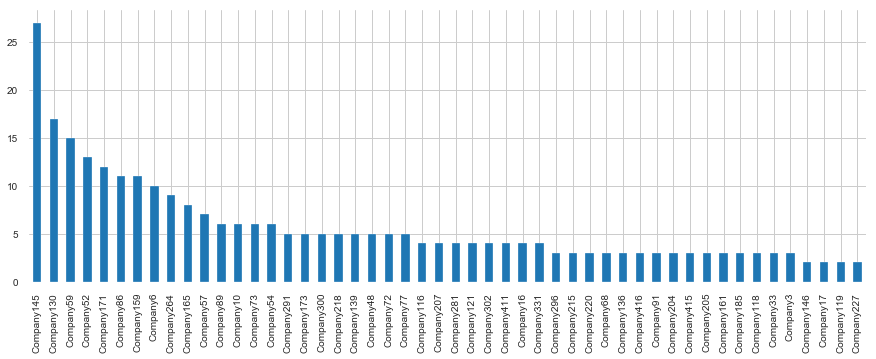

In [19]:
data['Customers.company'].value_counts().head(50).plot(kind='bar', figsize=(15,5))

In [20]:
company_grouped = data.groupby('Customers.company').agg(aggf).reset_index()
company_grouped.head(10)

Customers.company Order_Items.qty     Order_Items.price
                               size sum               sum
0          Company0               1   1             57.20
1          Company1               2   5             73.78
2         Company10               6   6            952.91
3        Company100               1   1             40.60
4        Company101               1   1            134.81
5        Company102               1   1              6.40
6        Company103               1   2             17.39
7        Company104               1   1            200.01
8        Company105               1   2             15.05
9        Company106               1   1             64.73

In [21]:
# Companies with biggest sales
company_max_sales = company_grouped.sort_values(('Order_Items.price', 'sum'), ascending=False)
company_max_sales.head()

Customers.company Order_Items.qty     Order_Items.price
                                 size sum               sum
52         Company145              27  27           2696.38
213        Company291               5   5           1503.63
407         Company83               2   2           1325.00
11         Company108               1   1           1043.75
2           Company10               6   6            952.91

In [22]:
company_max_volume = company_grouped.sort_values(('Order_Items.qty', 'sum'), ascending=False)
company_max_volume.head()

Customers.company Order_Items.qty      Order_Items.price
                                 size  sum               sum
380         Company59              15  381            519.15
271        Company343               2  133             84.64
410         Company86              11  105            202.40
36         Company130              17   71            482.50
81         Company171              12   47            383.30

### 3.8 Correlation between variables

In [23]:
# for Order Items quantity
abs(data.corr()['Order_Items.qty']).sort_values(ascending=False)[:15]

Order_Items.qty                  1.000000
Orders.external_id               1.000000
Customers.account_id             0.884615
Orders.fee_amount                0.798637
Orders.discount_amount           0.729562
Orders.weight                    0.693375
Orders.partial_ship              0.464816
Orders.payment_amount            0.398148
Orders.subtotal                  0.391748
Orders.total                     0.384124
Orders.coupon_amount             0.334728
Order_Items.reorder_frequency    0.247176
Order_Items.flags                0.164787
Orders.reorder_id                0.136379
Products.sale_price              0.133074
Name: Order_Items.qty, dtype: float64

In [24]:
# for Order items price
abs(data.corr()['Order_Items.price']).sort_values(ascending=False)[:15]

Order_Items.price           1.000000
Products.map_price          0.999868
Customers.tax_exempt        0.997496
Products.amazon_price       0.995401
Order_Items.cost            0.994663
Products.sale_price         0.992029
Products.cost               0.986458
Products.price              0.982685
Products.list_price         0.909242
Products.shipping_weight    0.846882
Customers.account_id        0.717073
Orders.weight               0.500000
Products.shipping_length    0.478433
Orders.total                0.428587
Orders.payment_amount       0.423907
Name: Order_Items.price, dtype: float64

## 4. Data Preparation
* Join, filter and transform data
* Clean data
    * Remove duplicates
    * Missing values
* Feature Selection for Recommender Systems

### 4.1 Remove duplicated columns
* I have checked there's no duplicated rows
* Transpose the dataframe to remove duplicated columns

In [25]:
data2 = data.T
data2 = data2.drop_duplicates().T
data2.shape

(4194, 146)

In [26]:
data2.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0          797         Christy            Dill          Company0   
1            3            John           Smith          Company1   
2            3            John           Smith          Company1   
3            4           James        Anderson               NaN   
4            5         Abraham          Pollak          Company3   

  Customers.create_date Customers.status Customers.mailing  \
0   2015-03-10 20:18:44              NaN               NaN   
1   2013-12-03 16:45:39              NaN               NaN   
2   2013-12-03 16:45:39              NaN               NaN   
3   2013-12-11 16:44:23              NaN               NaN   
4   2013-12-12 15:19:59                0                 0   

  Customers.reminders Customers.tax_exempt Customers.account_id  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  Customers.last_modified Customers.customer_type Orders.id Orders.fname  \
0     2015-07-24 18:58:26                       0      3758      Christy   
1     2015-07-24 18:59:14                       0        23         John   
2     2015-07-24 18:59:14                       0      9531         John   
3     2015-07-24 18:30:46                       0        29        James   
4     2015-07-24 18:58:36                       0        30      Abraham   

  Orders.lname Orders.company Orders.order_number Orders.reorder_id  \
0         Dill       Company0                3758               NaN   
1        Smith       Company1                  23               NaN   
2        Smith       Company1                9531               NaN   
3     Anderson            NaN                  29               NaN   
4       Pollak       Company3                  30               NaN   

  Orders.external_source Orders.external_id Orders.currency Orders.subtotal  \
0                    NaN                NaN             USD            57.2   
1                    NaN                NaN             USD              20   
2                    NaN                NaN             USD           68.78   
3                   Ebay                NaN             USD           19.56   
4                    NaN                NaN             USD           36.05   

  Orders.tax Orders.shipping Orders.coupon_id Orders.coupon_amount  \
0          0            9.95               13                 2.86   
1        NaN            9.99              NaN                  NaN   
2          0            9.95              NaN                  NaN   
3          0            9.95              NaN                  NaN   
4        NaN            9.95              NaN                  NaN   

  Orders.fee_name Orders.fee_amount Orders.discount_name  \
0             NaN               NaN                  NaN   
1             NaN               NaN                  NaN   
2             NaN               NaN                  NaN   
3             NaN              0.04                  NaN   
4             NaN               NaN                  NaN   

  Orders.discount_amount Orders.total Orders.balance_due  \
0                    NaN        64.29                NaN   
1                    NaN        29.99                NaN   
2                    NaN        78.73                NaN   
3                    NaN        29.55                NaN   
4                    NaN           46                NaN   

  Orders.shipping_carrier Orders.shipping_method Orders.weight  \
0                   fedex              11|Ground           NaN   
1                   fedex              11|Ground           NaN   
2                  manual    0|Standard Shipping           NaN   
3                     NaN              11|Ground   

### 4.2 Missing Values

In [27]:
data2.isnull().sum().sort_values(ascending=True)[:100]

Customers.id                    0
Orders.status                   0
Orders.placed_date              0
Order_Items.id                  0
Orders.subtotal                 0
Orders.currency                 0
Order_Items.product_name        0
Order_Items.qty                 0
Order_Items.price               0
Orders.order_number             0
Orders.lname                    0
Orders.fname                    0
Orders.total                    0
Customers.create_date           0
Customers.last_modified         0
Customers.fname                 0
Customers.lname                 0
Orders.id                       0
Order_Items.cost                3
Orders.payment_status           5
Orders.payment_amount          18
Orders.payment_date            18
Orders.updated_date            23
Order_Items.product_id         43
Products.name                 157
Products.last_modified        157
Products.vendor               157
Products.seo_url              157
Products.status               157
Products.impor

There're many missing values in the dataset, which make the data very sparse.

### 4.3 Feature Selection for Recommender Systems

In [28]:
data2[['Products.status', 'Products.vendor', 'Products.shopping_flags', 'Products.shopping_brand', 
       'Products.shopping_type']].describe(include='all')

Products.status  Products.vendor  Products.shopping_flags  \
count            4037.0           4037.0                   3917.0   
unique              5.0              8.0                      7.0   
top                 0.0              1.0                     62.0   
freq             2647.0           2981.0                   3818.0   

       Products.shopping_brand Products.shopping_type  
count                     4032                   2334  
unique                     101                      1  
top                    MEDLINE          Miscellaneous  
freq                      2672                   2334

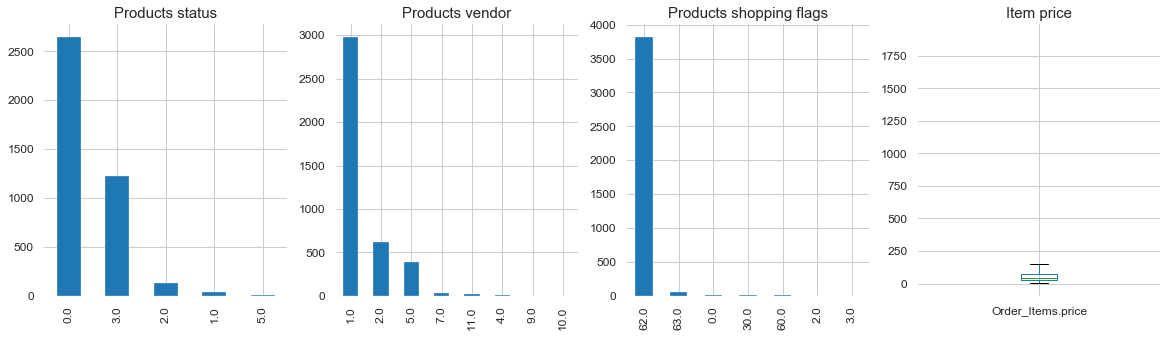

In [29]:
fig, axarr = plt.subplots(1, 4, figsize=(20, 5))

data2['Products.status'].value_counts().plot.bar(ax=axarr[0], fontsize=12)
axarr[0].set_title("Products status", fontsize=15)

data2['Products.vendor'].value_counts().plot.bar(ax=axarr[1], fontsize=12)
axarr[1].set_title("Products vendor", fontsize=15)

data2['Products.shopping_flags'].value_counts().plot.bar(ax=axarr[2], fontsize=12)
axarr[2].set_title("Products shopping flags", fontsize=15)

data2['Order_Items.price'].plot.box(ax=axarr[3], fontsize=12)
axarr[3].set_title("Item price", fontsize=15)

plt.subplots_adjust(hspace=.3)

seaborn.despine()

In [30]:
prod_attributes = data2[['Order_Items.id', 'Order_Items.product_name', 'Products.status', 'Products.vendor', 
                         'Products.shopping_flags', 'Order_Items.price']]
prod_attributes.head()

Order_Items.id                       Order_Items.product_name  \
0           5284                         Basic Rollators, Green   
1             31                       Urinary Drain Bags,0.000   
2          11655  SensiCare Nitrile Exam Gloves, Blue, XX-Large   
3           1816                    Basket for 2-Button Walkers   
4             40                                     Tens Units   

  Products.status Products.vendor Products.shopping_flags Order_Items.price  
0               0               1                      62              57.2  
1               1               1                      62                 5  
2               0               1                      62             68.78  
3               0               1                      62             19.56  
4               1               1                      62             36.05

In [31]:
prod_list = prod_attributes.loc[:].values.tolist()
prod_list

[[5284, 'Basic Rollators, Green', 0.0, 1.0, 62.0, 57.2],
 [31, 'Urinary Drain Bags,0.000', 1.0, 1.0, 62.0, 5.0],
 [11655,
  'SensiCare Nitrile Exam Gloves, Blue, XX-Large',
  0.0,
  1.0,
  62.0,
  68.78],
 [1816, 'Basket for 2-Button Walkers', 0.0, 1.0, 62.0, 19.56],
 [40, 'Tens Units', 1.0, 1.0, 62.0, 36.05],
 [341, 'FitRight Ultra Protective Underwear, Large', nan, nan, nan, 44.46],
 [2997,
  'SensiCare Silk Nitrile Exam Gloves, Dark Blue, Small',
  nan,
  nan,
  nan,
  14.63],
 [1797,
  'Aloetouch Sensitive Personal Cleansing Baby Wipes',
  0.0,
  1.0,
  62.0,
  39.19],
 [1796, 'Universal Raised Toilet Seat', 0.0, 1.0, 62.0, 59.75],
 [1795,
  'Drive medical excersize paddler item #RTL10273 ',
  nan,
  nan,
  nan,
  34.0],
 [1794, 'Drive Medical item # RTL10273', nan, nan, nan, 34.0],
 [127,
  'Biohazard Multipurpose Sharps Containers, Red, 8.000',
  3.0,
  1.0,
  62.0,
  10.76],
 [143, 'Protection Plus Disposable Underpads', 0.0, 1.0, 62.0, 43.06],
 [142,
  'Aloetouch SELECT Premium

In [32]:
# Define product dictionary including product ID, product name, and product attributes (i.e. status, vendor, shopping_flags, price)
prod_dict = {}
for line in prod_list:
    prodID = int(line[0])
    prod_name = line[1]
    attributes = line[2:]
    prod_dict[prodID] = (prod_name, attributes)
    
prod_dict

{5284: ('Basic Rollators, Green', [0.0, 1.0, 62.0, 57.2]),
 31: ('Urinary Drain Bags,0.000', [1.0, 1.0, 62.0, 5.0]),
 11655: ('SensiCare Nitrile Exam Gloves, Blue, XX-Large',
  [0.0, 1.0, 62.0, 68.78]),
 1816: ('Basket for 2-Button Walkers', [0.0, 1.0, 62.0, 19.56]),
 40: ('Tens Units', [1.0, 1.0, 62.0, 36.05]),
 341: ('FitRight Ultra Protective Underwear, Large', [nan, nan, nan, 44.46]),
 2997: ('SensiCare Silk Nitrile Exam Gloves, Dark Blue, Small',
  [nan, nan, nan, 14.63]),
 1797: ('Aloetouch Sensitive Personal Cleansing Baby Wipes',
  [0.0, 1.0, 62.0, 39.19]),
 1796: ('Universal Raised Toilet Seat', [0.0, 1.0, 62.0, 59.75]),
 1795: ('Drive medical excersize paddler item #RTL10273 ',
  [nan, nan, nan, 34.0]),
 1794: ('Drive Medical item # RTL10273', [nan, nan, nan, 34.0]),
 127: ('Biohazard Multipurpose Sharps Containers, Red, 8.000',
  [3.0, 1.0, 62.0, 10.76]),
 143: ('Protection Plus Disposable Underpads', [0.0, 1.0, 62.0, 43.06]),
 142: ('Aloetouch SELECT Premium Spunlace Person

In [33]:
prod_dict[31][1]

[1.0, 1.0, 62.0, 5.0]

## 5. Recommender Systems

### 5.1 Find Similar Products using Cosine Similarity

In [34]:
# Calculate Cosine Similarity for product attributes
from scipy import spatial

def ComputeDistance(a,b):
    attributesA = a[1]
    attributesB = b[1]
    attributeDistance = spatial.distance.cosine(attributesA, attributesB)
    return attributeDistance

In [35]:
ComputeDistance(prod_dict[31], prod_dict[142])

0.10723925394336031

### 5.2 K-Nearest-Neighbors Recommender

In [36]:
import operator

def getNeighbors(prodID, K):
    distances = []
    for prod in prod_dict:
        if (prod != prodID):
            dist = ComputeDistance(prod_dict[prodID], prod_dict[prod])
            distances.append((prod, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

prod_id = 31
K = 10
neighbors = getNeighbors(prodID, K)
neighbors

[127, 1788, 1785, 1783, 1775, 1759, 1740, 189, 31, 1816]

In [37]:
print('Recommendated products for product #' + str(prod_id) + ': ')
for neighbor in neighbors:
    print(prod_dict[neighbor][0])

Recommendated products for product #31: 
Biohazard Multipurpose Sharps Containers, Red, 8.000
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes
Ultrasound Gel, Blue
Urinary Drain Bags,0.000
Basket for 2-Button Walkers


### 5.3 Co-occurrence Matrix

In [38]:
# Utility Matrix
df_prod = data.pivot_table(index='Customers.id', columns='Order_Items.product_name', values='Order_Items.qty', 
                            dropna=False)
df_prod = df_prod.replace(np.nan, 0).astype(int)
df_prod

Order_Items.product_name   BUCKET, REPLACEMENT FOR MDS89668XW  \
Customers.id                                                    
3                                                           0   
4                                                           0   
5                                                           0   
7                                                           0   
8                                                           0   
10                                                          0   
11                                                          0   
12                                                          0   
13                                                          0   
14                                                          0   
15                                                          0   
21                                                          0   
22                                                          0   
23                                                          0   
24                                                          0   
25                                                          0   
26                                                          0   
27                                                          0   
30                                                          0   
31                                                          0   
32                                                          0   
33                                                          0   
35                                                          0   
37                                                          0   
39                                                          0   
40                                                          0   
41                                                          0   
42                                                          0   
43                                                          0   
44                                                          0   
...                                                       ...   
3701                                                        0   
3702                                                        0   
3703                                                        0   
3704                                                        0   
3705                                                        0   
3706                                                        0   
3708                                                        0   
3709                                                        0   
3710                                                        0   
3711                                                        0   
3713                                                        0   
3714                                                        0   
3715                                                        0   
3716                                                        0   
3717                                                        0   
3719                                                        0   
3720                                                        0   
3721                                                        0   
3722                                                        0   
3723                                                        0   
3724                                                        0   
3725                                                        0   
3726                                                        0   
3728                                                        0   
3729                                                        0   
3730                                                        0   
3732                                                        0   
3733                                                        0   
3735                               

ap
* b-
* m-
* c-

In [39]:
co_occur_matrix = df_prod.T.dot(df_prod)
co_occur_matrix

Order_Items.product_name                             BUCKET, REPLACEMENT FOR MDS89668XW  \
Order_Items.product_name                                                                  
 BUCKET, REPLACEMENT FOR MDS89668XW                                                   1   
1 Box Of Medline Commode Liners with Absorbent Pad                                    0   
1 Pad of CURAD Mediplast Wart Pad                                                     0   
1-Ply Blockade AngelStat Surgical Gowns, Ceil B...                                    0   
1/2" self-adhesive hook material, 25 yard dispe...                                    0   
1/2" self-adhesive loop material, 25 yard dispe...                                    0   
100% Cotton Unisex Reversible Hyperbaric Scrub ...                                    0   
100% Cotton Unisex Reversible Tops, Ceil Blue, MHS                                    0   
10215-s                                                                               0   
12112-3                                                                               0   
12124-3                                                                               0   
18" Hamper Stands, Standard                                                           0   
19" Flyweight Lightweight Blue Transport Wheelc...                                    0   
2" self-adhesive loop material, 10 yard dispens...                                    0   
2" self-adhesive loop material, 25 yard dispens...                                    0   
2-Ply Tissue/Poly Professional Towels, White, N...                                    0   
2000 Extra-Wide Wheelchairs                                                           0   
2000 Wheelchairs                                                                      0   
24 Hour Urine Collection Bottle, 3000.0 ML                                            0   
3 Pack, Hospital Receiving Blankets, Baby Blank...                                    0   
3 Pack, Hospital Receiving Blankets, Baby Blank...                                    0   
3 Wheel Flame Blue Rollator Walker with Basket ...                                    0   
3 Wheel Flame Red Rollator Walker with Basket T...                                    0   
3 Wheel Walker Rollator with Basket Tray and Po...                                    0   
3 Wheel Walker Rollator with Basket Tray and Po...                                    0   
3" Wheels For Walkers                                                                 0   
3/4" Guardian Utility Tips, Gray                                                      0   
4-Panel Abdominal Binders, 2X-Large                                                   0   
4-Panel Abdominal Binders, Large/X-Large                                              0   
5" Wheels For Walkers                                                                 0   
...                                                                                 ...   
Wheelchair Drainage Bag Holders                                                       0   
Wheelchair Elevating Legrest Assembly Part                                            0   
Wheelchair IV Pole Attachments                                                        0   
Wheelchair Oxygen Tank Holder by Maddak, Black                                        0   
Wheelchair Rear Anti-Tip Devices                                                      0   
Wheelchair Seat Belt, Auto Style Closure, 48"                                         0   
Wheelchair Seat Belt, Auto Style Closure, 60"                                         0   
Wheelchair Seat Belt, Hook-and-Loop Fasteners, 60"                                    0   
Wheelchair Wheel Lock/Brake Assembly                                                  0   
Wheelchair tray with rim and straps, 24" x 20",...                                    0   
Wheelchair tray, economy, 24" x 20", wood finish                                      0

In [40]:
item1 = 'Silent Knight Pill Crusher Pouches'
recommend_item1 = co_occur_matrix[item1].replace(0, np.nan).dropna().sort_values(ascending=False).drop(item1)
recommend_item1

Order_Items.product_name
Medline Silent Knight Pill Crusher, 200 pouches included       21.0
Remedy Basics No-Rinse Cleansing Spray, 4.000 OZ               20.0
Medline Silent Knight Pill Crusher                              9.0
Medline [LINKS MEDICAL PRODUCTS] Silent Knight Pill Crusher     8.0
Supreme Urinals, Clear                                          8.0
Silent Knight Pill Crusher, 150 Free Pouches Included           6.0
Enteral Feeding and Irrigation Syringes, 60.00                  6.0
Centamin Liquid                                                 6.0
Non-Sterile Graduated Plastic Medicine Cups                     5.0
Silent Knight Pill Crushers                                     3.0
Medline Silent Knight Pill Crusher, 200 Free Pouches            3.0
Rectangular Plastic Washbasins, Graphite, 8.000                 2.0
DenTips Oral Swabsticks, Green                                  2.0
DenTips Oral Swabsticks, Blue                                   2.0
Silent Knight Pill Crus

In [41]:
item2 = 'sEMG - single use uni-gel electrodes only, case of 100'
recommend_item2 = co_occur_matrix[item2].replace(0, np.nan).dropna().sort_values(ascending=False).drop(item2)
recommend_item2

Order_Items.product_name
sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel    1.0
Name: sEMG - single use uni-gel electrodes only, case of 100, dtype: float64